gaussian


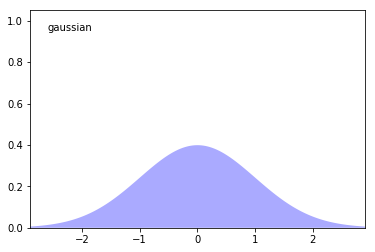

tophat


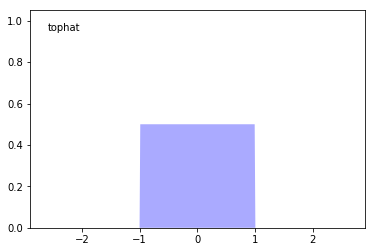

epanechnikov


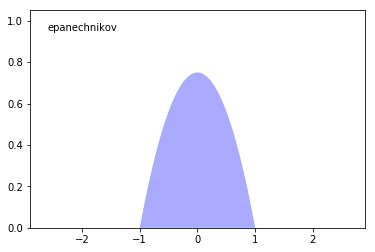

exponential


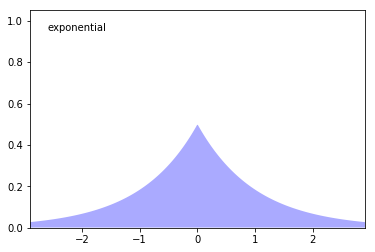

linear


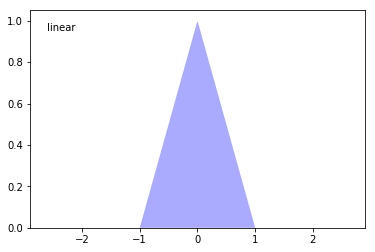

cosine


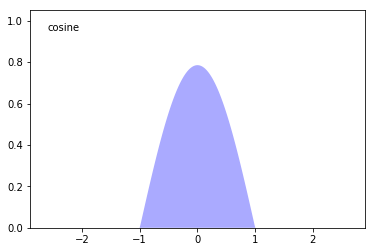

In [16]:
# Estimación de Densidad por Kernel (Nucleo)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))
list_kernel=['gaussian', 'tophat', 'epanechnikov','exponential', 'linear', 'cosine']
for kernel in list_kernel:
    print(kernel)
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    plt.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    plt.text(-2.6, 0.95, kernel)

    plt.ylim(0, 1.05)
    plt.xlim(-2.9, 2.9)
    plt.show()



In [25]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x.reshape(-1,1))
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid.reshape(-1,1))
    return np.exp(log_pdf)

In [107]:
# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 100)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
X = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1.2, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1.2, 0.3).pdf(x_grid))

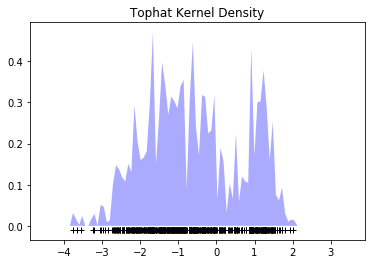

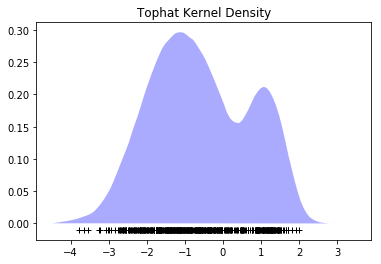

In [112]:
kde = KernelDensity(kernel='cosine', bandwidth=bwval[np.argmax(resOut)]).fit(X.reshape(-1,1))
log_dens = kde.score_samples(x_grid.reshape(-1,1))
plt.fill(x_grid, np.exp(log_dens), fc='#AAAAFF')
plt.title("Tophat Kernel Density")
plt.plot(X, np.zeros(X.shape[0]) - 0.01, '+k')
plt.show()

kde = KernelDensity(kernel='cosine', bandwidth=bwval[np.argmin(resOut)]).fit(X.reshape(-1,1))
log_dens = kde.score_samples(x_grid.reshape(-1,1))
plt.fill(x_grid, np.exp(log_dens), fc='#AAAAFF')
plt.title("Cosine Kernel Density")
plt.plot(X, np.zeros(X.shape[0]) - 0.01, '+k')
plt.show()



